## matching between 3c catalog and sources found with pbdsf

In [3]:
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, FK5
from astropy.coordinates import AltAz

Ra3c=[]
Dec3c=[]
myf=open("3csources.txt")
#first 2 lines are info
myf.readline()
myf.readline()
#newf=open("3csources.ann","w")
#newf.write("COLOR YELLOW\nPA SKY\n")
for line in myf:
    name = line.strip().split()[0]
    ra=":".join(line.strip().split()[5:8])
    dec=":".join(line.strip().split()[8:11])
    mycoord = coord.SkyCoord([ra + " " + dec], frame=coord.FK4, unit=(u.hourangle,u.deg))
    mycoord = mycoord.transform_to(coord.FK5)
    #newf.write("TEXT %3.2f %3.2f %s\n"%(mycoord.ra.deg[0],mycoord.dec.deg[0],name))
    Ra3c.append(mycoord.ra.deg[0])
    Dec3c.append(mycoord.dec.deg[0])

    
myf1=open("ExtractedSources_woCYG.ann")
#first 2 lines are info
myf1.readline()
myf1.readline()

Ra1=[]
Dec1=[]

for line in myf1:
    ra1=line.strip().split()[1]
    dec1=line.strip().split()[2]
    Ra1.append(float(ra1))
    Dec1.append(float(dec1))

coord3c = SkyCoord(Ra3c, Dec3c, frame=coord.FK5, unit=(u.deg,u.deg))
extracted = SkyCoord(Ra1, Dec1, frame=coord.FK5, unit=(u.deg,u.deg))
match3c = coord.match_coordinates_sky(extracted, coord3c, nthneighbor=1)

In [4]:
#indeces in coord3c
select = match3c[1].arcmin<6
coord_idx = match3c[0][select]

matched_coord_extracted=list(extracted[select])

matched_coord_3c=[]
for i in coord_idx:
    matched=coord3c[i]
    matched_coord_3c.append(matched)

ra_matched_3c=[]
dec_matched_3c=[]
for i in matched_coord_3c:
    ra_matched_3c.append(i.ra.deg)
    dec_matched_3c.append(i.dec.deg)
    
ra_extract=[]
dec_extract=[]
for i in matched_coord_extracted:
    ra_extract.append(i.ra.deg)
    dec_extract.append(i.dec.deg)   

## To project the coordinates of the Extracted sources and of the ACE_sources to a plane tangent at zenith

In [5]:
ACE = EarthLocation(lat=52.91*u.deg, lon=6.87*u.deg, height=1*u.m)
utcoffset = 0*u.hour  # UT
time = Time('2018-11-07 19:55:08.75') - utcoffset

AA = AltAz(location=ACE, obstime=time)

c_extracted = SkyCoord(np.array(ra_extract),np.array(dec_extract), unit='deg')
coord_aa_extracted = c_extracted.transform_to(AA)

c_3csources = SkyCoord(np.array(ra_matched_3c), np.array(dec_matched_3c), unit='deg')
coord_aa_3c = c_3csources.transform_to(AA)

### 3c sources

In [6]:
#alt is longitude
#az is latitude

threeC_cartesian = SkyCoord(np.array(coord_aa_3c.az.radian), np.array(coord_aa_3c.alt.radian), unit='radian')
threeC_cartesian.representation = 'cartesian'

ext_cartesian = SkyCoord(np.array(coord_aa_extracted.az.radian), np.array(coord_aa_extracted.alt.radian), unit='radian')
ext_cartesian.representation = 'cartesian'

Diff_X=[]
Diff_Y=[]
Diff_Z=[]

for i, j in zip(threeC_cartesian, ext_cartesian):
    diff_x = i.x - j.x
    diff_y = i.y - j.y
    diff_z = i.z - j.z
    Diff_X.append(diff_x)
    Diff_Y.append(diff_y)
    Diff_Z.append(diff_z)

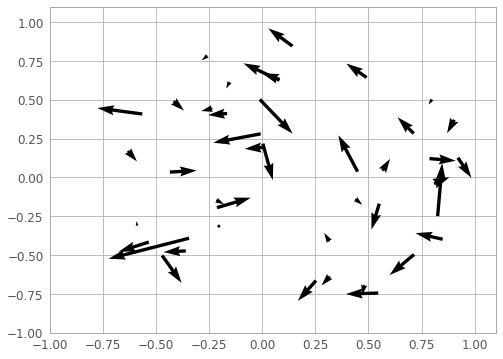

In [7]:
fig1, ax1 = plt.subplots()

ax1.quiver(threeC_cartesian.x, threeC_cartesian.y, Diff_X, Diff_Y)
ax1.axis([-1,1.1,-1,1.1])
plt.show()